# 17. 난 스케치를 할테니 너는 채색을 하거라

2014년 GAN(Generative Adverarial Networks)이 세상에 나타난 이후, computer vision 및 다양한 분야에서 관심을 받아 활발하게 응용되면서 발전했다.   
이미지 생성 모델로 사용되는 일반적인 GAN에 조건을 부여하여 내가 원하는 유형의 이미지를 생성해낼 수 있도록 알아보자.

# 17-2. 조건 없는 생성 모델(Unconditional Generative Model), GAN

![](https://d3s0tskafalll9.cloudfront.net/media/images/mnist_results.max-800x600.png)

GAN을 이용해 MNIST, CIFAR-10 등의 데이터셋을 생성하는 과정을 생각해보자.

'7'이라는 이미지를 만들고자 MNIST 데이터셋을 이용해 GAN을 학습시켰다. 학습이 완료된 모델을 이용해서 '7'이라 쓰여있는 이미지를 얻기 위해 어떤 방법을 이용해야할까?

여기서 할 수 있는 방법은 다양한 노이즈를 계속 입력하며 '7'이라는 숫자 이미지가 생성되길 기다리는 것이다. 운이 좋다면 한번에 나오겠지만, 운이 없다면 100개가 넘는 이미지를 생성해도 안나올 수 있다.   
또한 '7' 이미지를 수만 개 만들어야 한다면, 상상만으로도 끔찍하다.

이렇게 잘 학습된 GAN을 이용해 실제 이미지를 생성할 때 답답한 점이 하나 있다면, 내가 원하는 종류의 이미지를 바로 생성해내지 못한다.   
다시말해 일반적인 GAN과 같은 unconditioned generative model은 내가 생성하고자 하는 데이터에 대해 제어하기 힘들다.

그래서 이를 해결하기 위해, 원하는 이미지를 바로 생성해내기 위해 어떤 방법을 이용해야 할까?

# 17-3. 조건 있는 생성 모델(Conditional Generative Model), cGAN

__Conditional Generative Adversarial Nets(cGAN)__은 내가 원하는 종류의 이미지를 생성하고자 할 때 GAN이 가진 생성 과정의 불편함을 해소하여, 내가 원하는 종류의 이미지를 생성할 수 있도록 고안된 방법이다.

### GAN의 목적 함수

먼저 GAN에 대해 간단히 복습해보자. GAN 구조는 Generator 및 Discriminator라 불리는 두 신경망이 minmax game을 통해 서로 경쟁하며 발전한다.   

$min_Gmax_DV(D,G) = E_{x-Pdata(x)}[logD(x)]+E_{z~p_z(z)[log(1-D(G(z)))]}$

다음과 같은 식으로 표현할 수 있는데 Generator는 이를 최소화하려, Discriminator는 이를 최대화하려 학습한다.   
$z$는 임의 노이즈를, $D, G$는 각각 Discriminator, Generator를 의미한다.

$D$인 Discriminator 입장에서 식을 해석해보자.   
실제 이미지를 1, 가짜 이미지를 0으로 두었을 때 $D$는 이 식을 최대화해야하며, 우변의 +를 기준으로 양쪽의 항 $(logD(x))$ 및 $log(1-D(G(z)))$이 모두 최대가 되게 해야한다.   
$D(x)$는 1이 되도록, $D(G(z))$는 0이 되도록 해야한다.   

다시 말해, 진짜 데이터 $(x)$를 진짜로, 가짜 데이터 $(G(z))$를 가짜로 정확히 예측하도록 학습해야한다.

이번에는 $G$인 Generator 입장에서 식을 해석해보자.   
$D$와 반대로 $G$는 위 식을 최소화해야 하고, 위 수식의 마지막 항 $log(1-D(G(z)))$만 최소화하면 된다.(우변의 첫번째 항은 G와 관련이 없다.)   
이를 최소화한다는 것은 log 내부가 0이 되도록 해야함을 뜻하며, $D(G(z))$가 1이 되도록 해야한다.   

$G$는 $z$를 입력받아 생성한 데이터 $G(z)$를 $D$가 진짜 데이터라고 예측할 만큼 진짜 같은 가짜 데이터를 만들도록 학습해야한다.

### cGAN의 목적 함수
$min_Gmax_DV(D,G)=E_{x~Pdata(x)}[logD(x|y)]+E_{z~P_z(z)[log(1-D(G(z|y)))]}$


GAN의 수식과 비교하면 $D(x)$가 $D(x|y)$로, $G(z)$가 $G(z|y)$로 바꼈다.   
이는 G와 D의 입력에 특정 조건을 나타내는 정보인 $y$를 같이 입력한다는 의미로, $y$를 추가로 입력받아 $G$ 입장에서는 식을 최소화하고, $D$ 입장에서는 식을 최대화하도록 학습한다.

여기서 $y$는 어떤 정보여도 상관이 없다. MNIST 데이터셋을 학습시키는 경우 $y$는 0~9까지의 label 정보가 된다.   
Generator가 노이즈 $z$를 입력받았을 때, 특정 조건 $y$가 함께 입력되기 때문에, $y$를 통해 $z$를 어떠한 이미지로 만들어야할지 방향을 제어할 수 있는 가이드 역할을 한다.

### 그림으로 이해하기
GAN과 cGAN의 feed forward 과정을 그림으로 비교해보자.   

##### GAN
![](https://d3s0tskafalll9.cloudfront.net/media/images/gan_img.max-800x600.png)

Generator를 보면 파란색 노이즈($z$)가 입력되고, 검정색 특정 representation으로 변환 후, 가짜 데이터 빨간색 $G(z)$를 생성한다.

Discriminator는 파란색 실제 데이터 $x$와 generator가 생성한 가짜 데이터 $G(z)$를 입력받아 검정색을 만들고 보라색 $D(x)$ 및 $D(G(z))$를 계산하여 진짜와 가짜를 식별한다.

##### cGAN
![](https://d3s0tskafalll9.cloudfront.net/media/images/cgan_img.max-800x600.png)

$y$ 정보를 담고 있는 초록색이 추가되었다.   
Generator 부분을 먼저 확인해보자.   
파란색 노이즈 $z$와 초록색 추가 정보 $y$를 함께 입력 받아 결합되어 검정색 representation으로 변환되어 가짜 데이터 $G(z|y)$가 생성되었다. MNIST, CIFAR-10 등의 데이터셋에 대해 학습시키는 경우 $y$는 레이블 정보이며, 일반적으로 one-hot 벡터를 입력으로 넣는다.

Discriminator 부분을 확인해보자.   
파란색 실제 데이터 $x$, generator가 생성한 핑크색 $G(z|y)$를 각각 입력받는다. $y$ 정보도 함께 입력되어 진짜와 가짜를 식별한다. MNIST나 CIFAR-10 등의 데이터셋에 대해 학습시키는 경우 실제 데이터 $x$, $y$는 알맞은 한 쌍을 이뤄야하며, 마찬가지로 Generator에 입력된 $y$와 $Discriminator$에 입력되는 $y$는 동일한 레이블이여야한다.

# 17-4. 내가 원하는 숫자 이미지 만들기 (1) Generator 구성하기

GAN, cGAN을 각각 간단하게 구현하고 실험해보자. 데이터셋은 MNIST를 사용한다.   
- [TF2-GAN](https://github.com/thisisiron/TF2-GAN)

### 데이터 준비하기
tensorflow-dataset 라이브러리를 통해 데이터를 불러오자.

In [ ]:
! pip list | grep tensorflow-dataset

tensorflow-datasets           4.0.1


local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


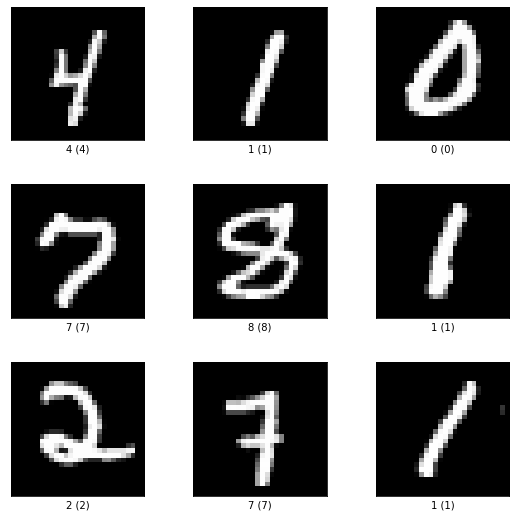

In [ ]:
import tensorflow_datasets as tfds

mnist, info =  tfds.load(
    "mnist", split="train", with_info=True
)

fig = tfds.show_examples(mnist, info)

여러개의 숫자 이미지와 그에 알맞는 레이블이 출력되었다. 이들을 학습 전에 필요한 몇 가지 전처리를 진행하자.   
이미지 픽셀 값을 -1~1 사이의 범위로 변경하고, 레이블 정보를 원-핫 인코딩으로 바꾸자.

In [ ]:
import tensorflow as tf

BATCH_SIZE = 128

def gan_preprocessing(data):
    image = data["image"]
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    return image

def cgan_preprocessing(data):
    image = data["image"]
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    
    label = tf.one_hot(data["label"], 10)
    return image, label

gan_datasets = mnist.map(gan_preprocessing).shuffle(1000).batch(BATCH_SIZE)
cgan_datasets = mnist.map(cgan_preprocessing).shuffle(100).batch(BATCH_SIZE)
print("✅")

✅


유도한 픽셀 값의 범위와, 원-핫 인코딩 레이블 정보를 제대로 적용했는지 확인해보자.

Label : tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)
Image Min/Max : -1.0 1.0


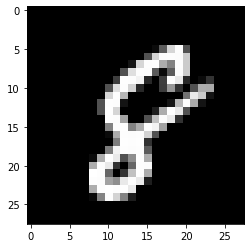

In [ ]:
import matplotlib.pyplot as plt

for i,j in cgan_datasets : break

# 이미지 i와 라벨 j가 일치하는지 확인해 봅니다.     
print("Label :", j[0])
print("Image Min/Max :", i.numpy().min(), i.numpy().max())
plt.imshow(i.numpy()[0,...,0], plt.cm.gray)

### GAN Generator 구성하기

tensorflow2의 subclassing 방법을 이용해보자. Subclassing 방법은 tensorflow.keras.Model을 상속받아 클래스를 만들며, 일반적으로 `__init__()` 메서드 안에서 레이어 구성을 정의하고, 구성된 레이어를 `call()` 메서드에 사용해 forward propagation을 진행한다. 이러한 Subclassing 방법은 Pytorch의 모델 구성방법과 매우 유사하다.   

먼저 GAN의 Generator를 구현해보자.

In [ ]:
from tensorflow.keras import layers, Input, Model

class GeneratorGAN(Model):
    def __init__(self):
        super(GeneratorGAN, self).__init__()

        self.dense_1 = layers.Dense(128, activation='relu')
        self.dense_2 = layers.Dense(256, activation='relu')
        self.dense_3 = layers.Dense(512, activation='relu')
        self.dense_4 = layers.Dense(28*28*1, activation='tanh')

        self.reshape = layers.Reshape((28, 28, 1))

    def call(self, noise):
        out = self.dense_1(noise)
        out = self.dense_2(out)
        out = self.dense_3(out)
        out = self.dense_4(out)
        return self.reshape(out)

print("✅")

✅


`__init__()` 메서드 안에 사용할 레이어를 모두 정의했다. 4개의 FC 레이어 중 한 개를 제외하고 모두 relu로 활성화했다.   
`call()` 메서드에서는 노이즈를 입력받아 `__init__()`에서 정의한 레이어들을 순서대로 통과한다.   
Generator는 숫자가 쓰인 이미지를 출력해야 하므로 마지막 출력은 `layers.Reshape((28,28,1))` 크기로 변환했다.

### cGAN Generator 구성하기

In [ ]:
class GeneratorCGAN(Model):
    def __init__(self):
        super(GeneratorCGAN, self).__init__()
        
        self.dense_z = layers.Dense(256, activation='relu')
        self.dense_y = layers.Dense(256, activation='relu')
        self.combined_dense = layers.Dense(512, activation='relu')
        self.final_dense = layers.Dense(28 * 28 * 1, activation='tanh')
        self.reshape = layers.Reshape((28, 28, 1))

    def call(self, noise, label):
        noise = self.dense_z(noise)
        label = self.dense_y(label)
        out = self.combined_dense(tf.concat([noise, label], axis=-1))
        out = self.final_dense(out)
        return self.reshape(out)
    
print("✅")

✅


GAN의 generator보다 복잡해보이지만, 크게 다르지 않다.   
노이즈 $z$와 라벨 $y$를 입력받아 FC레이어와 relu 활성화 함수를 통과한다. 이들이 연결(combine)되어 FC레이어와 relu를 통과한다. 그리고 이들이 28x28x1 차원의 형태로 FC하고 tanh를 거쳐 `layers.Reshape((28, 28, 1))` 형태로 변환하여 출력한다.

이렇게 임의 노이즈 및 레이블 정보로부터 숫자 이미지를 생성하는 Generator를 구현했다.

# 17-5. 내가 원하는 숫자 이미지 만들기 (2) Discriminator 구성하기

### GAN Discriminator 구성하기

실제 이미지와 Generator가 생성한 이미지에 대해 진짜와 가짜를 식별하는 Discriminator를 구현해보자.

먼저 GAN부터 만들어보자.

In [ ]:
class DiscriminatorGAN(Model):
    def __init__(self):
        super(DiscriminatorGAN, self).__init__()
        self.flatten = layers.Flatten()
        
        self.blocks = []
        for f in [512, 256, 128, 1]:
            self.blocks.append(
                layers.Dense(f, activation=None if f==1 else "relu")
            )
        
    def call(self, x):
        x = self.flatten(x)
        for block in self.blocks:
            x = block(x)
        return x
    
print("✅")

✅


`__init__()`에 `blocks`라는 리스트를 만든다음 for loop를 이용하여 필요한 레이어들을 차곡차곡 쌓았다. 이러한 방식을 이용하면 각각의 fully-connected 레이어를 매번 정의하지 않아도 되므로 많은 레이어가 필요할 때 편리하다.   
Discriminator의 입력은 Generator가 생성한 (28,28,1) 크기의 이미지이며, 이를 fully-connected 레이어로 학습하기 위해 `call()`에서 가장 먼저 `layers.Flatten()`이 적용된다.   
그리고 레이어들이 쌓여있는 `blocks`에 대해 for loop를 이용하여 레이어들을 순서대로 하나씩 꺼내 입력 데이터를 통과시킨다. 마지막 fully-connected 레이어를 통과하면 진짜 및 가짜 이미지를 나타내는 1개의 값이 출력된다.

### cGAN Discriminator 구성하기

cGAN의 discriminator는 `Maxout`이라는 특별한 레이어가 사용된다. 이를 간단하게 설명하면 두 레이어 사이를 연결할 때, 여러개의 FC 레이어를 통과시켜 그 중 가장 큰 값을 가져오도록 한다. 2개의 FC 레이어를 사용할 때 `Maxout`을 식으로 표현하면 다음과 같다.   
$max(w_1^Tx+b_1, w_2^Tx+b_2$)$   
![](https://d3s0tskafalll9.cloudfront.net/media/images/e-25-4-1.max-800x600.png)

이렇게 fully-connected 레이어를 2개만 사용한다면 다차원 공간에서 2개의 면이 교차된 모양의 activation function 처럼 작동한다. 

사용하는 FC 레이어 개수가 늘어나면 점점 곡선 형태인 activation function이 될 수 있다.   
![](https://d3s0tskafalll9.cloudfront.net/media/original_images/e-25-4-2.png)

`Maxout`을 구성해보자. 이전 모델을 정의한 것과 비슷하게 `__init__()`, `call()` 메서드를 구성한다.

In [ ]:
class Maxout(layers.Layer):
    def __init__(self, units, pieces):
        super(Maxout, self).__init__()
        self.dense = layers.Dense(units*pieces, activation="relu")
        self.dropout = layers.Dropout(.5)    
        self.reshape = layers.Reshape((-1, pieces, units))
    
    def call(self, x):
        x = self.dense(x)
        x = self.dropout(x)
        x = self.reshape(x)
        return tf.math.reduce_max(x, axis=2)

print("✅")

✅


Maxout 레이어를 구성할 때 units, pieces의 설정이 필요하며, units 차원 수를 가진 FC 레이어를 pieces 개수만큼 만들고 그 중 최댓값을 출력한다.   
예를들어, 사용할 Maxout 레이어가 units=100, pieces=10 으로 설정한다면 입력으로부터, 100차원의 representation을 10개 만들고, 10개 중 최댓값을 가져와 최종 1개의 100차원 representation이 출력된다. 이를 수식으로 표현하면 다음과 같다.   

$max(w_1^Tx+b1, w_2^Tx+b2, ..., w_9^Tx+b_9, w_10^Tx+b10$   

Maxout 레이어를 3번만 사용하면 cGAN의 Discriminator를 구성할 수 있다.

In [ ]:
class DiscriminatorCGAN(Model):
    def __init__(self):
        super(DiscriminatorCGAN, self).__init__()
        self.flatten = layers.Flatten()
        
        self.image_block = Maxout(240, 5)
        self.label_block = Maxout(50, 5)
        self.combine_block = Maxout(240, 4)
        
        self.dense = layers.Dense(1, activation=None)
    
    def call(self, image, label):
        image = self.flatten(image)
        image = self.image_block(image)
        label = self.label_block(label)
        x = layers.Concatenate()([image, label])
        x = self.combine_block(x)
        return self.dense(x)
    
print("✅")

✅


generator가 생성한 (28, 28, 1) 크기의 이미지가 입력되므로, `layers.Flatten()`이 적용된다. 그리고 이미지 입력 및 레이블 입력 각각은 `Maxout` 레이어를 한 번씩 통과한 후 서로 결합되어 `Maxout` 레이어를 한 번 더 통과한다. 마지막 FC 레이어를 통과하면 진짜 및 가짜 이미지를 나타내는 1개의 값이 출력된다.

# 17-6. 내가 원하는 숫자 이미지 만들기 (3) 학습 및 테스트하기

Generator, Discriminator를 이용해 MNIST를 학습하고 각 모델로 직접 숫자 손글씨를 생성해보자.   

GAN, cGAN 각각의 모델 학습에 공통적으로 필요한 loss function과 optimizer를 정의하자.   
진짜 및 가짜를 구별하기 위해 binary cross entropy 사용하고, adam optimizer를 이용해 학습하자.

In [ ]:
from tensorflow.keras import optimizers, losses

bce = losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return bce(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    return bce(tf.ones_like(real_output), real_output) + bce(tf.zeros_like(fake_output), fake_output)

gene_opt = optimizers.Adam(1e-4)
disc_opt = optimizers.Adam(1e-4)    

print("✅")

✅


### GAN으로 MNIST 학습하기

이전 단계에서 구성한 GeneratorGAN, DiscriminatorGAN 모델 클래스를 이용하자.

입력으로 사용되는 노이즈를 100차원으로 설정했으며, 하나의 배치 크기 데이터로 업데이트하는 함수를 아래와 같이 작성했다.

In [ ]:
gan_generator = GeneratorGAN()
gan_discriminator = DiscriminatorGAN()

@tf.function()
def gan_step(real_images):
    noise = tf.random.normal([real_images.shape[0], 100])
    
    with tf.GradientTape(persistent=True) as tape:
        # Generator를 이용해 가짜 이미지 생성
        fake_images = gan_generator(noise)
        # Discriminator를 이용해 진짜 및 가짜이미지를 각각 판별
        real_out = gan_discriminator(real_images)
        fake_out = gan_discriminator(fake_images)
        # 각 손실(loss)을 계산
        gene_loss = generator_loss(fake_out)
        disc_loss = discriminator_loss(real_out, fake_out)
    # gradient 계산
    gene_grad = tape.gradient(gene_loss, gan_generator.trainable_variables)
    disc_grad = tape.gradient(disc_loss, gan_discriminator.trainable_variables)
    # 모델 학습
    gene_opt.apply_gradients(zip(gene_grad, gan_generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_grad, gan_discriminator.trainable_variables))
    return gene_loss, disc_loss

print("✅")

✅


In [ ]:
EPOCHS = 10
for epoch in range(1, EPOCHS+1):
    for i, images in enumerate(gan_datasets):
        gene_loss, disc_loss = gan_step(images)

        if (i+1) % 100 == 0:
            print(f"[{epoch}/{EPOCHS} EPOCHS, {i+1} ITER] G:{gene_loss}, D:{disc_loss}")

[1/10 EPOCHS, 100 ITER] G:2.3912506103515625, D:0.11626876890659332
[1/10 EPOCHS, 200 ITER] G:2.3750221729278564, D:0.11669021099805832
[1/10 EPOCHS, 300 ITER] G:3.015982151031494, D:0.09616316854953766
[1/10 EPOCHS, 400 ITER] G:1.989094614982605, D:0.3001575469970703
[2/10 EPOCHS, 100 ITER] G:3.917903184890747, D:0.12389031052589417
[2/10 EPOCHS, 200 ITER] G:3.2568984031677246, D:0.2127404510974884
[2/10 EPOCHS, 300 ITER] G:2.5828075408935547, D:0.11978736519813538
[2/10 EPOCHS, 400 ITER] G:3.6884889602661133, D:0.33828112483024597
[3/10 EPOCHS, 100 ITER] G:4.4296722412109375, D:0.06576787680387497
[3/10 EPOCHS, 200 ITER] G:2.3227665424346924, D:0.20070411264896393
[3/10 EPOCHS, 300 ITER] G:3.31866455078125, D:0.11706659197807312
[3/10 EPOCHS, 400 ITER] G:3.1370182037353516, D:0.11601085960865021
[4/10 EPOCHS, 100 ITER] G:3.263000011444092, D:0.17106418311595917
[4/10 EPOCHS, 200 ITER] G:3.7531228065490723, D:0.060164906084537506
[4/10 EPOCHS, 300 ITER] G:4.237442970275879, D:0.056276

epoch를 10을 주고 학습을 진행해보자.   
100번의 반복마다 각 loss를 출력하도록 했다.

이렇게 학습된 모델을 테스트해보자. 100차원 노이즈 입력을 10개 사용하여 10개의 숫자 손글씨 데이터를 생성해 시각화한다.

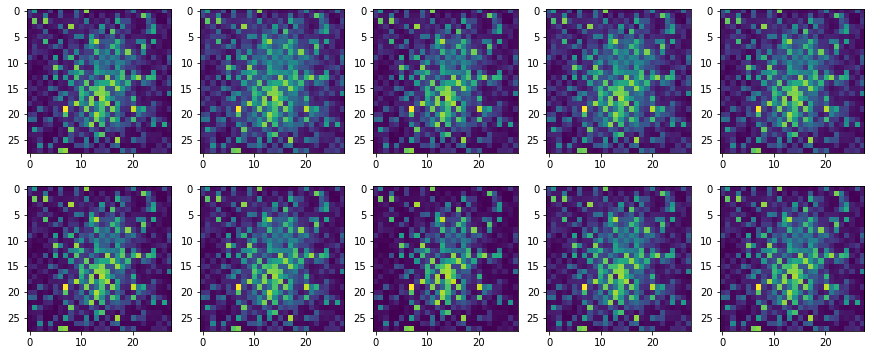

In [ ]:
import numpy as np

noise = tf.random.normal([10, 100])

output = gan_generator(noise)
output = np.squeeze(output.numpy())

plt.figure(figsize=(15,6))
for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.imshow(output[i-1])

10 epoch 학습만으로는 좋은 결과가 나오지 않았다.   
위와 동일한 조건으로 500 epoch 학습한 가중치를 확인해보자.

```
$ mkdir -p ~/aiffel/conditional_generation/gan
$ cp ~/data/gan/GAN_500.zip ~/aiffel/conditional_generation/gan/
$ cd ~/aiffel/conditional_generation/gan && unzip GAN_500.zip
```

나는 지금부터 아이펠 클라우드 환경이 아닌 코랩을 사용한다. 그러므로 구글 드라이브에 업로드된 데이터셋을 사용하자.   
`/content/drive/MyDrive/aiffel_dataset/conditional_generation/gan`

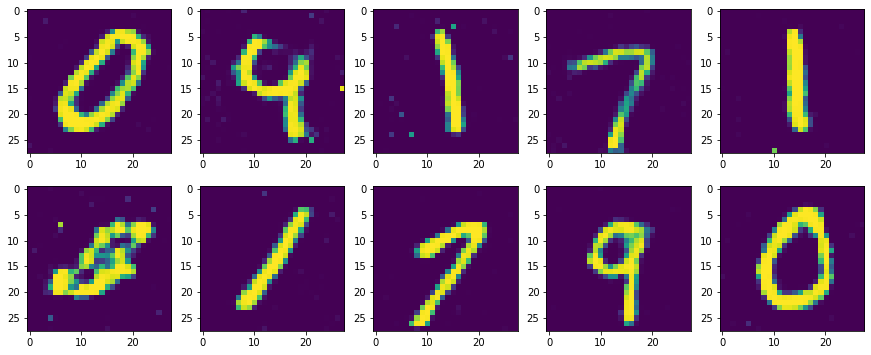

In [ ]:
import os
# weight_path = os.getenv('HOME')+'/aiffel/conditional_generation/gan/GAN_500'
weight_path = '/content/drive/MyDrive/aiffel_dataset/conditional_generation/gan/GAN_500'

noise = tf.random.normal([10, 100]) 

gan_generator = GeneratorGAN()
gan_generator.load_weights(weight_path)

output = gan_generator(noise)
output = np.squeeze(output.numpy())

plt.figure(figsize=(15,6))
for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.imshow(output[i-1])

숫자처럼 보이는 결과물들이 나온걸 확인할 수 있다.   
하지만 앞서 말한거 처럼 원하는 숫자가 나올 수 있게 cGAN을 이용해서 학습해보자.

### cGAN으로 MNIST 학습하기

이전 단계에서 구성한 GeneratorCGAN, DiscriminatorCGAN 모델 클래스를 이용하자.   
위 GAN의 경우처럼 약간의 학습으로는 제대로 된 생성 결과를 얻을 수 없으니 이번에는 연습 삼아 1 epoch만 진행해보자.

In [ ]:
cgan_generator = GeneratorCGAN()
cgan_discriminator = DiscriminatorCGAN()

@tf.function()
def cgan_step(real_images, labels):
    noise = tf.random.normal([real_images.shape[0], 100])
    
    with tf.GradientTape(persistent=True) as tape:
        fake_images = cgan_generator(noise, labels)
        
        real_out = cgan_discriminator(real_images, labels)
        fake_out = cgan_discriminator(fake_images, labels)
        
        gene_loss = generator_loss(fake_out)
        disc_loss = discriminator_loss(real_out, fake_out)
    
    gene_grad = tape.gradient(gene_loss, cgan_generator.trainable_variables)
    disc_grad = tape.gradient(disc_loss, cgan_discriminator.trainable_variables)
    
    gene_opt.apply_gradients(zip(gene_grad, cgan_generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_grad, cgan_discriminator.trainable_variables))
    return gene_loss, disc_loss


EPOCHS = 1
for epoch in range(1, EPOCHS+1):
    
    for i, (images, labels) in enumerate(cgan_datasets):
        gene_loss, disc_loss = cgan_step(images, labels)
    
        if (i+1) % 100 == 0:
            print(f"[{epoch}/{EPOCHS} EPOCHS, {i} ITER] G:{gene_loss}, D:{disc_loss}")

[1/1 EPOCHS, 99 ITER] G:5.7759504318237305, D:0.005082994699478149
[1/1 EPOCHS, 199 ITER] G:3.9986608028411865, D:0.03814873471856117
[1/1 EPOCHS, 299 ITER] G:4.059273719787598, D:0.1202230155467987
[1/1 EPOCHS, 399 ITER] G:3.435798168182373, D:0.078402578830719


Generator, Discriminator에 label 정보만 입력한걸 제외하면 GAN과 큰 차이가 없다.

GAN의 경우와 동일하게 미리 500 epoch 학습한 가중치를 이용해서 결과물을 확인해보자.

```
$ mkdir -p ~/aiffel/conditional_generation/cgan
$ cp ~/data/cgan/CGAN_500.zip ~/aiffel/conditional_generation/cgan/
$ cd ~/aiffel/conditional_generation/cgan && unzip CGAN_500.zip
```

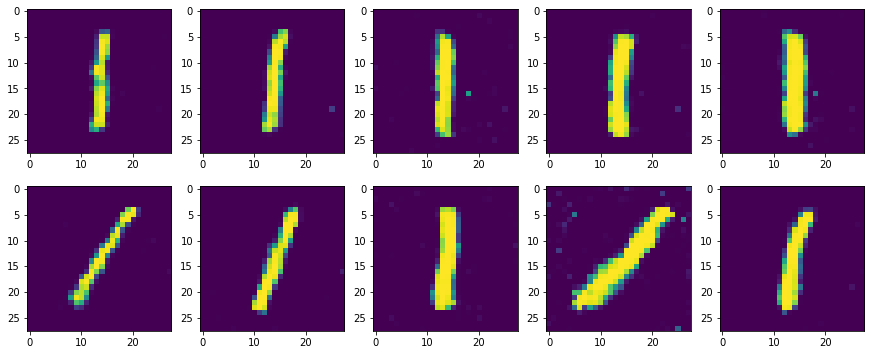

In [ ]:
number = 1  # TODO : 생성할 숫자를 입력해 주세요!!

# weight_path = os.getenv('HOME')+'/aiffel/conditional_generation/cgan/CGAN_500'
weight_path = '/content/drive/MyDrive/aiffel_dataset/conditional_generation/cgan/CGAN_500'

noise = tf.random.normal([10, 100])

label = tf.one_hot(number, 10)
label = tf.expand_dims(label, axis=0)
label = tf.repeat(label, 10, axis=0)

generator = GeneratorCGAN()
generator.load_weights(weight_path)

output = generator(noise, label)
output = np.squeeze(output.numpy())

plt.figure(figsize=(15,6))
for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.imshow(output[i-1])

`number`에 입력한 숫자가 그대로 시각화 되는걸 확인할 수 있다. 이렇게 cGAN에 조건을 주고 학습하여 특정한 숫자를 만들어 내는 방법을 도출했다.

# 17-7. GAN의 입력에 이미지를 넣는다면? Pix2Pix

지금까지 cGAN에 대해 알아보고 실험하면서, 작은 조건만으로 우리가 원하는 클래스의 이미지를 생성할 수 있음을 확인했다. 만약 입력 자체가 조건이 된다면 어떨까?   
MNIST cGAN처럼 클래스 레이블을 조건으로 입력하는게 아니라, 더 자세하게 내가 원하는 이미지를 얻기 위해 이미지를 조건으로 줄 수 없을까?   

이번에 소개하는 __Pix2Pix__는 기존 노이즈 입력을 이미지로 변환하는 일반적인 GAN이 아닌, __이미지를 입력으로 원하는 다른 형태의 이미지로 변환__시킬 수 있는 GAN 모델이다.

Pix2Pix를 제안한 논문 [Image-to-Image Translation with Conditional Adversarial Networks](https://arxiv.org/pdf/1611.07004.pdf)의 제목을 보면 의도가 다 담겨있다.   

Conditional Adversarial Networks로 Image-to-Image Translation을 수행한다는 뜻이다.   
여기서 Conditional Adversarial Networks는 cGAN과 같은 구조를 말하는 것인데, Image-to-Image Translation은 무엇을 뜻하는 것일까?

Image-to-Image Translation은 말 그대로 이미지 간 변환을 말한다. 

![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_results.max-800x600.png)

첫 번째 Labels to Street Scene 이미지 결과를 확인해보자. 픽셀 별로 레이블 정보만 존재하는 segmentation map을 입력으로 실제 거리 사진을 생성했다. 이 외에 흑백 사진을 컬러로 변환하거나, 낮에 찍은 사진을 밤으로 변환하거나, 가방 스케치를 이용해 채색된 가방을 만들기도 한다.

한 이미지의 픽셀에서 다른 이미지의 픽셀로 pixel to pixel 변환한다는 뜻에서 Pix2Pix라는 이름으로 불린다. 이 구조는 최근 활발하게 연구 및 응용되는 GAN 기반의 Image-to-Image Translation 작업에서 가장 기초가 되는 연구이다.

노이즈와 label 정보를 함께 입력했던 cGAN은 FC 레이어를 연속적으로 쌓아 만들었지만, 이미지 변환이 목적인 Pix2Pix는 이미지를 다루는데 효율적인 convolution layer를 활용한다. GAN 구조를 기반으로 하기 때문에 크게 Generator, Discriminator 두 가지 구성 요소로 이루어진다.

### Pix2Pix(generator)

generator는 어떠한 이미지를 입력받아 변환된 이미지를 출력하기 위해 사용된다. 입력 이미지와 변환된 이미지의 크기는 동일해야하며, 이러한 문제에서 흔히 사용되는 구조는 Encoder-Decoder 구조이다.   
![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_generator.max-800x600.png)

Encoder에서 입력 이미지 $x$를 받으면 단계적으로 이미지를 down sampling 하면서 입력 이미지의 중요한 representation을 학습한다. Decoder에서 이를 반대로 이용해 이미지를 up sampling하며 입력 이미지와 동일한 크기로 변환된 이미지 $y$를 생성한다.   

이러한 과정은 모두 convolution 레이어로 진행되며, 레이어 내의 수 많은 파라미터를 학습하여 잘 변환된 이미지를 얻는다. 여기서 한 가지, Encoder의 최종 출력은 위 그림 중간에 위치한 가장 작은 사각형으로 `bottleneck`이라고 불리는 이 부분은 이미지 $x$의 가장 중요한 특징을 담고 있다.

bottleneck 부분의 중요하지만 작은 특징이 변환된 이미지 $y$를 생성하는데 충분한 정보를 제공할까?   
이런 점을 보완하기 위해 Generator 구조를 하나 더 제안한다. __U-Net__ 구조이다.   
![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_generator_unet.max-800x600.png)

Encoder, Decoder로 구성된 Generator와 다른 점은, 각 레이어마다 Encoder와 Decoder가 연결(skip connection)되어있다.   
Decoder가 변환된 이미지를 더 잘 생성하도록 Encoder로부터 더 많은 추가 정보를 이용하는 방법이며, 이러한 U-Net 구조의 유무에 따라 결과물이 크게 차이난다.   
![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_result_g.max-800x600.png)

U-Net은 이전에 segmentation 작업을 위해 제안된 구조이다. 더 알고싶으면 논문 리뷰를 확인해보자 [U-Net 논문 리뷰](https://medium.com/@msmapark2/u-net-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-u-net-convolutional-networks-for-biomedical-image-segmentation-456d6901b28a)

### Pix2Pix(Loss Function)

Generator 구조만 사용해서 이미지를 변환할 수 있다.   
변환하고자 하는 이미지를 Encoder에 입력하여 Decoder의 출력으로 변환된 이미지를 얻을 수 있다. 출력된 이미지와 실제 이미지의 차이로 L2(MSE), L1(MAE) 같은 손실을 계산한 후 이를 역전파하여 네트워크를 학습시키면 된다.   
이미지 변환이 가능은 하지만 문제는 변환된 이미지의 품질이다. 아래의 L1이라 써있는 결과가 Generator만 이용해 변환된 실제 이미지 사이의 L1 손실을 이용해 만들어낸 결과이다.   
![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_result_loss.max-800x600.png)

L1 결과는 매우 흐릿하다. 이미지를 변환하는데 L1이나 L2 손실만 이용해서 학습하는 경우 이런 경향이 있다. Generator가 단순히 이미지의 평균적인 손실만 줄이고자 파라미터를 학습하기 때문에 생긴 현상이다.

반면 cGAN 기반의 학습은 비교적 세밀한 정보를 표현하고 있다. Discriminator를 잘 속이려면 Generator가 Ground truth라 쓰여진 이미지처럼 진짜 이미지를 만들어야 하기 때문이다. 논문에서는 L1 손실과 cGAN 손실을 같이 사용하면 더더욱 좋은 결과를 얻을 수 있다고 한다.

### Pix2Pix(Discriminator)

위 결과를 보면 실제 같은 이미지를 얻기 위해 GAN의 학습 방법을 이용해야하며, Generator를 발전시킬 Discriminator가 필요하다.   

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/dcgan_d.png)

이 그림은 DCGAN의 Discriminator를 나타낸다.   
DCGAN의 Discriminator는 생성된 가짜 이미지 혹은 진짜 이미지를 하나씩 입력받아 convolution 레이어를 이용해 크기를 줄여나가며, 최종적으로 하나의 이미지에 하나의 확률 값을 출력한다.   
__Pix2Pix는 이 과정에서 하나의 이미지에 하나의 확률 값을 도출하는게 진짜, 가짜를 판별하는데 좋은 것인가? 하는 의문을 갖게 된다.__

![](https://d3s0tskafalll9.cloudfront.net/media/images/patchgan.max-800x600.png)

그래서 다음과 같이 Discriminator를 간략하게 나타낸다. 하나의 이미지가 discriminator 입력으로 들어오면, convolution layer를 거쳐 확률 값을 나타내는 최종 결과를 생성하는데, 그 결과는 하나의 값이 아닌 여러 개의 값을 가진다. 그림의 Prediction은 16개의 값을 갖고 있다.   
입력 이미지의 파란 점선 영역은 여러개의 출력 중 하나의 출력을 계산하기 위한 입력 이미지의 receptive field 영역을 나타내고 있으며, 전체 영역을 다 보는 것이 아닌 일부 영역만 진짜, 가짜를 판별하는 하나의 확률 값을 도출한다.

이런 방식으로 영역별로 진짜, 가짜를 나타내는 여러 개의 확률 값을 계산할 수 있으며, 이 값을 평균으로 최종 Discriminator의 출력을 생성한다. 해당 방법은 이미지의 일부 영역(patch)을 이용한다고 __PatchGAN__이라 불린다. __일반적으로 이미지에서 거리가 먼 두 픽셀은 서로 연관성이 거의 없기 때문에 특정 크기를 가진 일부 영역에 대해 세부적으로 진짜, 가짜를 판별__하는 것이 Generator로 하여금 더 진짜 같은 이미지를 만들도록 하는 방법이다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/patchgan_results.max-800x600.png)

286x286 사이즈의 입력 이미지를 넣어 filter 사이즈를 정해 만든 결과물이다.   
너무 작은 patch를 사용하면 품질이 좋지 않고, 70x70의 결과물이 너무 큰 286x286 보다 조금 더 사실적인 이미지를 생성하므로 PatchGAN의 사용이 성공적이라 볼 수 있다.

# 17-8. 난 스케치를 할 테니 너는 채색을 하거라 (1) 데이터 준비하기

pix2pix 모델을 직접 구현하고 실험해보기 위해 사용할 데이터셋은 [Sketch2Pokemon info](https://www.kaggle.com/norod78/sketch2pokemon)이다. 이번에 학습용 데이터셋만 따로 갖고왔다.

학습용 데이터셋에 830개의 이미지가 있고, 각 256x256 크기의 이미지 쌍이 나란히 붙어 256x512 크기의 이미지로 구성되어 있다.   
```
$ mkdir -p ~/aiffel/conditional_generation/data
$ ln -s ~/data/sketch2pokemon.zip ~/aiffel/conditional_generation/data
$ cd ~/aiffel/conditional_generation/data && unzip sketch2pokemon.zip
```

In [9]:
import os

# data_path = os.getenv('HOME')+'/aiffel/conditional_generation/data/pokemon_pix2pix_dataset/train/'
data_path = '/content/drive/MyDrive/aiffel_dataset/conditional_generation/data/pokemon_pix2pix_dataset/train/'
print(data_path)
print("number of train examples :", len(os.listdir(data_path)))

/content/drive/MyDrive/aiffel_dataset/conditional_generation/data/pokemon_pix2pix_dataset/train/
number of train examples : 830


데이터셋에서 임의로 6장을 선택해서 시각화해보자.


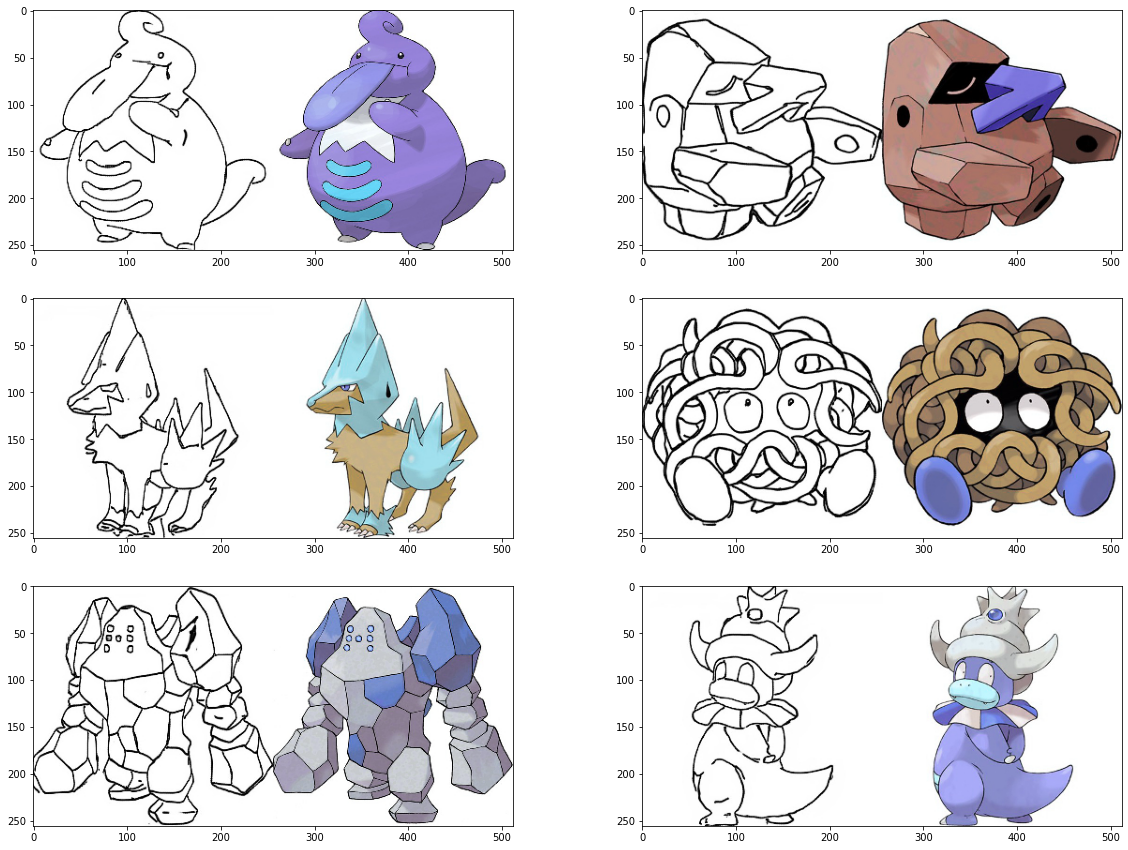

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
for i in range(1, 7):
    f = data_path + os.listdir(data_path)[np.random.randint(800)]
    img = cv2.imread(f, cv2.IMREAD_COLOR)
    plt.subplot(3,2,i)
    plt.imshow(img)

하나의 이미지에 포켓몬 스케치와 실제 포켓몬 이미지가 포함되어 있음을 확인할 수 있다. 이미지 하나를 열어 크기를 확인해보자.

(256, 512, 3)


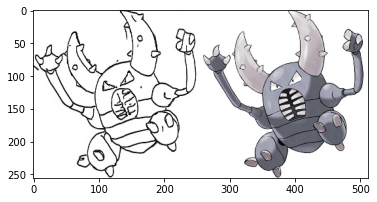

In [14]:
f = data_path + os.listdir(data_path)[0]
img = cv2.imread(f, cv2.IMREAD_COLOR)
print(img.shape)
plt.imshow(img)

이번에 목표는 첫 번째 스케치를 Pix2Pix 모델에 넣어 두 번째 그림처럼 채색된 이미지를 생성해야한다. 그렇게 하기위에 먼저 이미지를 256x256으로 좌, 우 두개로 분할하자.

그리고 학습에 사용할 수 있는 데이터가 830개 밖에 안되므로 데이터의 다양성을 높이기 위해 augmentation 방법을 적용해보자.

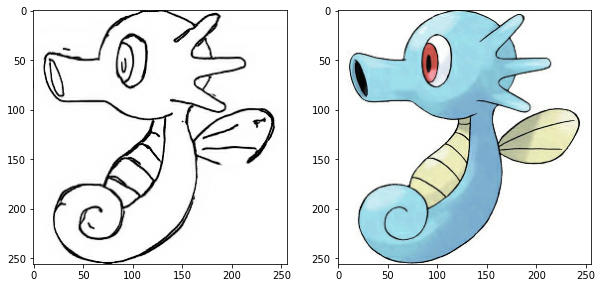

In [15]:
import tensorflow as tf

def normalize(x):
    x = tf.cast(x, tf.float32)
    return (x/127.5) - 1

def denormalize(x):
    x = (x+1)*127.5
    x = x.numpy()
    return x.astype(np.uint8)

def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, 3)
    
    w = tf.shape(img)[1] // 2
    sketch = img[:, :w, :] 
    sketch = tf.cast(sketch, tf.float32)
    colored = img[:, w:, :] 
    colored = tf.cast(colored, tf.float32)
    return normalize(sketch), normalize(colored)

f = data_path + os.listdir(data_path)[1]
sketch, colored = load_img(f)

plt.figure(figsize=(10,7))
plt.subplot(1,2,1); plt.imshow(denormalize(sketch))
plt.subplot(1,2,2); plt.imshow(denormalize(colored))

In [16]:
from tensorflow import image
from tensorflow.keras.preprocessing.image import random_rotation

@tf.function() # 빠른 텐서플로 연산을 위해 @tf.function()을 사용합니다. 
def apply_augmentation(sketch, colored):
    stacked = tf.concat([sketch, colored], axis=-1)
    
    _pad = tf.constant([[30,30],[30,30],[0,0]])
    if tf.random.uniform(()) < .5:
        padded = tf.pad(stacked, _pad, "REFLECT")
    else:
        padded = tf.pad(stacked, _pad, "CONSTANT", constant_values=1.)

    out = image.random_crop(padded, size=[256, 256, 6])
    
    out = image.random_flip_left_right(out)
    out = image.random_flip_up_down(out)
    
    if tf.random.uniform(()) < .5:
        degree = tf.random.uniform([], minval=1, maxval=4, dtype=tf.int32)
        out = image.rot90(out, k=degree)
    
    return out[...,:3], out[...,3:]   

print("✅")

✅


- 이미지를 채널 축으로 concat한다. 두 이미지가 각각 3채널인 경우 6채널이 된다.
- 위의 결과에 50% 확률로 refection 또는 constant padding이 30픽셀의 pad width만큼 적용된다.
- 위 결과에 256, 256 ,6 크기를 가진 이미지를 임의로 잘라낸다.
- 위 결과를 50% 확률로 가로로 뒤집는다.
- 위 결과를 50% 확률로 세로로 뒤집는다.
- 위 결과를 50% 확률로 회전한다.

> 그런데 왜 이미지를 6채널로 바꿨을까?

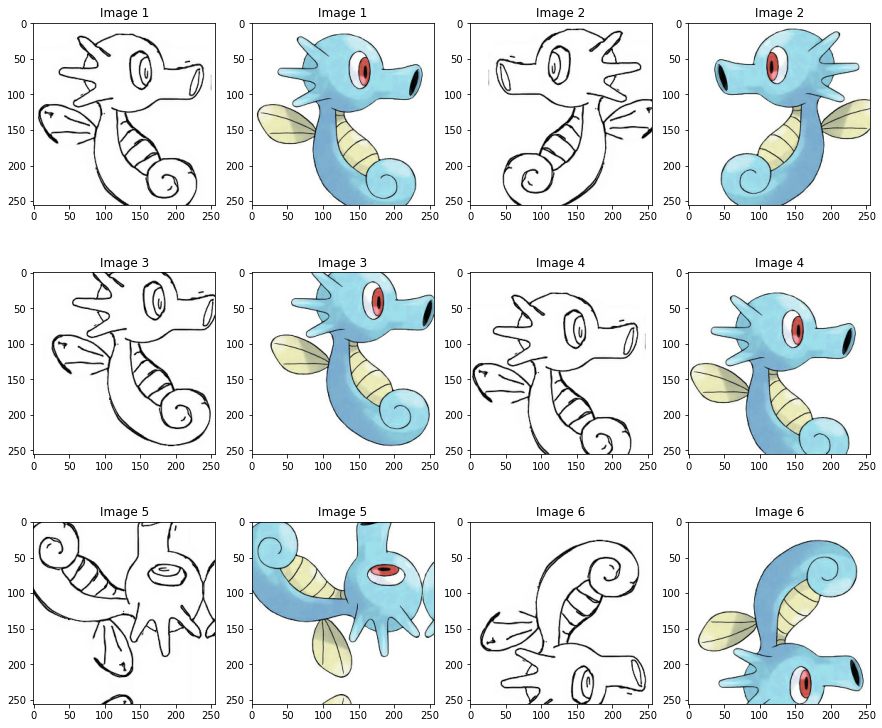

In [17]:
plt.figure(figsize=(15,13))
img_n = 1
for i in range(1, 13, 2):
    augmented_sketch, augmented_colored = apply_augmentation(sketch, colored)
    
    plt.subplot(3,4,i)
    plt.imshow(denormalize(augmented_sketch)); plt.title(f"Image {img_n}")
    plt.subplot(3,4,i+1); 
    plt.imshow(denormalize(augmented_colored)); plt.title(f"Image {img_n}")
    img_n += 1

위 과정들을 학습 데이터에 적용하여, 잘 적용되었는지 이미지 하나만 시각화하여 확인해보자.

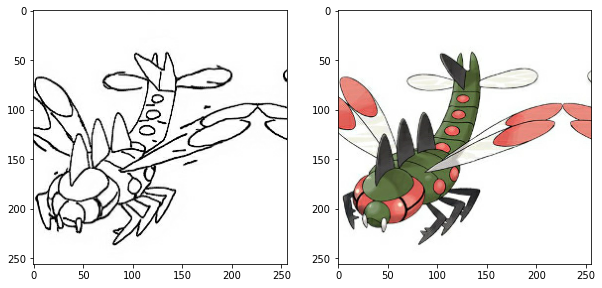

In [18]:
from tensorflow import data

def get_train(img_path):
    sketch, colored = load_img(img_path)
    sketch, colored = apply_augmentation(sketch, colored)
    return sketch, colored

train_images = data.Dataset.list_files(data_path + "*.jpg")
train_images = train_images.map(get_train).shuffle(100).batch(4)

sample = train_images.take(1)
sample = list(sample.as_numpy_iterator())
sketch, colored = (sample[0][0]+1)*127.5, (sample[0][1]+1)*127.5

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(sketch[0].astype(np.uint8))
plt.subplot(1,2,2); plt.imshow(colored[0].astype(np.uint8))

# 17-9. 난 스케치를 할 테니 너는 채색을 하거라 (2) Generator 구성하기

Pix2Pix 구조를 구현해보자. cGAN을 구현한거처럼 tensorflow의 subclassing 방법을 이용해 모델을 만들자.

### Generator의 구성요소 알아보기

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/paper_g.png)

pix2pix 논문에 나온 내용이다. C64는 64개의 필터, CD512는 512개의 필터를 말한다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/refer_g.max-800x600.png)

위 그림의 ENCODE와 DECODE 노드를 기준으로 이미지 크기가 작아졌다가 커지는걸 볼 수 있다. 채널의 개수는 반대로 움직인다.

### Generator 구현하기

C64, C128 등 쓰여진 것과 같이 `convolution -> batchnorm -> leakyReLU` 3개의 레이어로 구성된 기본적인 블록을 만들어 하나의 레이어로 만들어보자.

In [19]:
from tensorflow.keras import layers, Input, Model

class EncodeBlock(layers.Layer):
    def __init__(self, n_filters, use_bn=True):
        super(EncodeBlock, self).__init__()
        self.use_bn = use_bn       
        self.conv = layers.Conv2D(n_filters, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.lrelu= layers.LeakyReLU(0.2)

    def call(self, x):
        x = self.conv(x)
        if self.use_bn:
            x = self.batchnorm(x)
        return self.lrelu(x)

print("✅")

✅


`__init__()` 메서드에서 `n_filters`, `user_bn`을 설정하여 사용할 필터의 개수와 BatchNorm 사용 여부를 결정할 수 있다.   
이외에 Convolution 레이어에서 필터의 크기(4) 및 stride(2)와 활성화 함수의 slope coefficient(0.2)는 모든 곳에서 고정되므로 지정했다.   

Encoder에 사용할 기본 블록을 구성했으니 이 블록을 여러 번 가져다 쓰면 쉽게 Encoder를 구성할 수 있다.

In [20]:
class Encoder(layers.Layer):
    def __init__(self):
        super(Encoder, self).__init__()
        filters = [64,128,256,512,512,512,512,512]
        
        self.blocks = []
        for i, f in enumerate(filters):
            if i == 0:
                self.blocks.append(EncodeBlock(f, use_bn=False))
            else:
                self.blocks.append(EncodeBlock(f))
    
    def call(self, x):
        for block in self.blocks:
            x = block(x)
        return x
    
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()

print("✅")

✅


각 블록을 거치면서 사용할 필터를 `filters` 리스트에 지정해두고, `blocks` 리스트에 사용할 블록들을 정의하여 `call()` 메서드에서 차례대로 블록들을 통과한다. 첫 번째 블록에서는 BatchNorm을 사용하지 않기 때문에 `if i == 0:` 의 `use_bn=False`로 적용했다.   

`get_summary`는 레이어가 제대로 구성되었는지 확인하기 위한 용도로 만들었다. Encoder에 256x256x3 크기의 데이터를 입력했을 때 어떤 크기의 데이터가 출력되는지 확인할 수 있다.

In [21]:
Encoder().get_summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 encode_block (EncodeBlock)  (None, 128, 128, 64)      3072      
                                                                 
 encode_block_1 (EncodeBlock  (None, 64, 64, 128)      131584    
 )                                                               
                                                                 
 encode_block_2 (EncodeBlock  (None, 32, 32, 256)      525312    
 )                                                               
                                                                 
 encode_block_3 (EncodeBlock  (None, 16, 16, 512)      2099200   
 )                                                               
                                                             

블록을 통과할수록 width, height 크기는 줄어들고, 필터의 개수는 늘어나 최종 1x1x512로 출력됐다.

비슷한 방식으로 Decoder를 구현해보자. 

In [22]:
class DecodeBlock(layers.Layer):
    def __init__(self, f, dropout=True):
        super(DecodeBlock, self).__init__()
        self.dropout = dropout
        self.Transconv = layers.Conv2DTranspose(f, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.relu = layers.ReLU()
        
    def call(self, x):
        x = self.Transconv(x)
        x = self.batchnorm(x)
        if self.dropout:
            x = layers.Dropout(.5)(x)
        return self.relu(x)

    
class Decoder(layers.Layer):
    def __init__(self):
        super(Decoder, self).__init__()
        filters = [512,512,512,512,256,128,64]
        
        self.blocks = []
        for i, f in enumerate(filters):
            if i < 3:
                self.blocks.append(DecodeBlock(f))
            else:
                self.blocks.append(DecodeBlock(f, dropout=False))
                
        self.blocks.append(layers.Conv2DTranspose(3, 4, 2, "same", use_bias=False))
        
    def call(self, x):
        for block in self.blocks:
            x = block(x)
        return x
            
    def get_summary(self, input_shape=(1,1,512)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()
        
print("✅")

✅


처음 세 개의 블록에 `Dropout`을 사용했으며, 마지막 convolution에는 3개의 필터를 사용해 출력하는 것을 확인할 수 있다.

In [23]:
Decoder().get_summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 1, 512)]       0         
                                                                 
 decode_block (DecodeBlock)  (None, 2, 2, 512)         4196352   
                                                                 
 decode_block_1 (DecodeBlock  (None, 4, 4, 512)        4196352   
 )                                                               
                                                                 
 decode_block_2 (DecodeBlock  (None, 8, 8, 512)        4196352   
 )                                                               
                                                                 
 decode_block_3 (DecodeBlock  (None, 16, 16, 512)      4196352   
 )                                                               
                                                           

width, height 크기가 점점 늘어나고 필터의 수는 줄어드는 것을 확인할 수 있다. 최종 256x256x3 크기로 출력되었다.

구현한 Encoder와 Decoder를 연결시키면 (256,256,3) -> (1,1,512)로 변환되고, (1,1,512) -> (256,256,3)로 변환되는 결과를 얻을 수 있다.

`tf.keras.Model`을 상속받아 이 둘을 연결한 Generator를 구성해보자.

In [24]:
class EncoderDecoderGenerator(Model):
    def __init__(self):
        super(EncoderDecoderGenerator, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    
    def call(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
   
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()
        

EncoderDecoderGenerator().get_summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 encoder_1 (Encoder)         (None, 1, 1, 512)         19544576  
                                                                 
 decoder_1 (Decoder)         (None, 256, 256, 3)       19542784  
                                                                 
Total params: 39,087,360
Trainable params: 39,076,480
Non-trainable params: 10,880
_________________________________________________________________


# 17-10. 난 스케치를 할 테니 너는 채색을 하거라 (3) Generator 재구성하기

![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_result_g2.max-800x600.png)

pix2pix의 Generator 구조는 두 가지를 제안했다.

단순한 Encoder-Decoder에 비해 U-Net 구조가 훨씬 더 실제 이미지에 가까운 품질을 보인다. 그러므로 전에 선언한 EncodeBlock과 DecodeBlock을 이용해 U-Net 구조를 만들고 실험해보자.

In [25]:
class EncodeBlock(layers.Layer):
    def __init__(self, n_filters, use_bn=True):
        super(EncodeBlock, self).__init__()
        self.use_bn = use_bn       
        self.conv = layers.Conv2D(n_filters, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.lrelu = layers.LeakyReLU(0.2)

    def call(self, x):
        x = self.conv(x)
        if self.use_bn:
            x = self.batchnorm(x)
        return self.lrelu(x)

    
class DecodeBlock(layers.Layer):
    def __init__(self, f, dropout=True):
        super(DecodeBlock, self).__init__()
        self.dropout = dropout
        self.Transconv = layers.Conv2DTranspose(f, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.relu = layers.ReLU()
        
    def call(self, x):
        x = self.Transconv(x)
        x = self.batchnorm(x)
        if self.dropout:
            x = layers.Dropout(.5)(x)
        return self.relu(x)
    
print("✅")

✅


In [26]:
class UNetGenerator(Model):
    def __init__(self):
        super(UNetGenerator, self).__init__()
        encode_filters = [64,128,256,512,512,512,512,512]
        decode_filters = [512,512,512,512,256,128,64]
        
        self.encode_blocks = []
        for i, f in enumerate(encode_filters):
            if i == 0:
                self.encode_blocks.append(EncodeBlock(f, use_bn=False))
            else:
                self.encode_blocks.append(EncodeBlock(f))
        
        self.decode_blocks = []
        for i, f in enumerate(decode_filters):
            if i < 3:
                self.decode_blocks.append(DecodeBlock(f))
            else:
                self.decode_blocks.append(DecodeBlock(f, dropout=False))
        
        self.last_conv = layers.Conv2DTranspose(3, 4, 2, "same", use_bias=False)
    
    def call(self, x):
        features = []
        for block in self.encode_blocks:
            x = block(x)
            features.append(x)
        
        features = features[:-1]
                    
        for block, feat in zip(self.decode_blocks, features[::-1]):
            x = block(x)
            x = layers.Concatenate()([x, feat])
        
        x = self.last_conv(x)
        return x
                
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()

print("✅")

✅


이전에는 없던 skip connection이 `call()` 내부에서 어떻게 구현되는지 집중적으로 확인해보자.

먼저 encode, decode block이 차례대로 `call()` 내부에서 연산을 수행한다. 이 때 이 둘 사이에 skip connection을 위해 `features` 리스트를 만들고 Encoder 내에서 사용된 블록들의 출력을 차례대로 담았다.   

Encoder의 최종 출력이 Decoder의 입력으로 들어가면서 다시 한번 각각 Decoder 블록들을 통과하는데, `features` 리스트에 있는 각각의 출력들이 Decoder 블록 연산 후 함께 연결되어 다음 블록의 입력으로 사용된다.

In [27]:
UNetGenerator().get_summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 encode_block_16 (EncodeBlock)  (None, 128, 128, 64  3072        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 encode_block_17 (EncodeBlock)  (None, 64, 64, 128)  131584      ['encode_block_16[0][0]']        
                                                                                            

# 17-11. 난 스케치를 할 테니 너는 채색을 하거라 (4) Discriminator 구성하기

### Discriminator의 구성요소 알아보기

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/paper_d.png)

![](https://d3s0tskafalll9.cloudfront.net/media/images/refer_d.max-800x600.png)

Generator 구성 요소와 비슷하게 C64로 표기되어 있다. 진짜 및 가짜 이미지를 판별하기 위해 최종 출력에 sigmoid를 사용했다.

2개의 입력 in, unknown을 받아 CONCAT한 후 ENCODE 노드 5개를 통과한다. 마지막 ENCODE 노드 제외하고 나머지 4개는 논문에서 표기된 C64-128-256-512를 말한다. 마지막은 1차원 출력을 위한 블록이 추가됐다.

최종적으로 출력되는 크기는 (30,30,1)이며 출력 이전의 노드는 출력의 크기가 32,31,30으로 1씩 감소하는 특징을 볼 수 있다.

최종 출력 크기가 (30,30,1)이 되어야 하는 이유는 70x70 PatchGAN을 사용했기 때문이다. 최종 (30,30) 출력에서 각 픽셀의 receptive field 크기를 (70,70)으로 맞추기 위해 discriminator 출력 크기를 (30,30) 크기로 강제로 맞추는 과정이다.

Convolution layer에서 kernel 크기, stride, padding 등을 토대로 출력 크기를 계산했던 방식을 사용하면 계산할 수 있다.

### Discriminator 구현하기


In [28]:
class DiscBlock(layers.Layer):
    def __init__(self, n_filters, stride=2, custom_pad=False, use_bn=True, act=True):
        super(DiscBlock, self).__init__()
        self.custom_pad = custom_pad
        self.use_bn = use_bn
        self.act = act
        
        if custom_pad:
            self.padding = layers.ZeroPadding2D()
            self.conv = layers.Conv2D(n_filters, 4, stride, "valid", use_bias=False)
        else:
            self.conv = layers.Conv2D(n_filters, 4, stride, "same", use_bias=False)
        
        self.batchnorm = layers.BatchNormalization() if use_bn else None
        self.lrelu = layers.LeakyReLU(0.2) if act else None
        
    def call(self, x):
        if self.custom_pad:
            x = self.padding(x)
            x = self.conv(x)
        else:
            x = self.conv(x)
                
        if self.use_bn:
            x = self.batchnorm(x)
            
        if self.act:
            x = self.lrelu(x)
        return x 

print("✅")

✅


- (128,128,32) 크기 입력이 `layers.ZeroPadding2D()`를 통과하면, width, height의 바깥에 0이 padding되어 (130,130,32) 가 된다.
- Conv2D를 통과하는데 필터 크기 4, stride 1의 convolution 레이어를 통과하면서 width, height가 3씩 줄어들고 필터의 개수는 64가 된다. (127, 127, 64)
- BatchNorm, LeakyReLU를 통과한다

In [29]:
inputs = Input((128,128,32))
out = layers.ZeroPadding2D()(inputs)
out = layers.Conv2D(64, 4, 1, "valid", use_bias=False)(out)
out = layers.BatchNormalization()(out)
out = layers.LeakyReLU(0.2)(out)

Model(inputs, out).summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 32)]    0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 130, 130, 32)     0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 127, 127, 64)      32768     
                                                                 
 batch_normalization_45 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 127, 127, 64)      0         
                                                                 
Total params: 33,024
Trainable params: 32,896
Non-trainable

이렇게 설정하면 Discriminator의 마지막 ENCODE 3개 width, height 1 픽셀씩 주는 과정을 적용할 수 있다.

Pix2Pix가 Discriminator가 70x70 PatchGAN을 사용하기 때문에 최종 출력을 (30,30) 크기로 맞추느라 조금 복잡한 과정이다. 이 블록을 이용해 Discriminator를 만들자.

In [30]:
class Discriminator(Model):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.block1 = layers.Concatenate()
        self.block2 = DiscBlock(n_filters=64, stride=2, custom_pad=False, use_bn=False, act=True)
        self.block3 = DiscBlock(n_filters=128, stride=2, custom_pad=False, use_bn=True, act=True)
        self.block4 = DiscBlock(n_filters=256, stride=2, custom_pad=False, use_bn=True, act=True)
        self.block5 = DiscBlock(n_filters=512, stride=1, custom_pad=True, use_bn=True, act=True)
        self.block6 = DiscBlock(n_filters=1, stride=1, custom_pad=True, use_bn=False, act=False)
        self.sigmoid = layers.Activation("sigmoid")
        
        # filters = [64,128,256,512,1]
        # self.blocks = [layers.Concatenate()]
        # for i, f in enumerate(filters):
        #     self.blocks.append(DiscBlock(
        #         n_filters=f,
        #         strides=2 if i<3 else 1,
        #         custom_pad=False if i<3 else True,
        #         use_bn=False if i==0 and i==4 else True,
        #         act=True if i<4 else False
        #     ))
    
    def call(self, x, y):
        out = self.block1([x, y])
        out = self.block2(out)
        out = self.block3(out)
        out = self.block4(out)
        out = self.block5(out)
        out = self.block6(out)
        return self.sigmoid(out)
    
    def get_summary(self, x_shape=(256,256,3), y_shape=(256,256,3)):
        x, y = Input(x_shape), Input(y_shape) 
        return Model((x, y), self.call(x, y)).summary()
    
print("✅")

✅


In [31]:
Discriminator().get_summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_7 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 concatenate_7 (Concatenate)    (None, 256, 256, 6)  0           ['input_6[0][0]',                
                                                                  'input_7[0][0]']          

시험 삼아 임의의 (256,256,3) 크기의 입력을 넣어 나오는 (30,30) 출력을 시각화해보자.

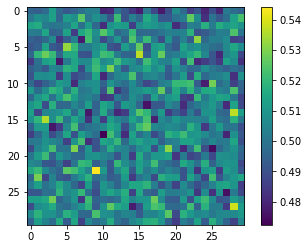

In [32]:
x = tf.random.normal([1,256,256,3])
y = tf.random.uniform([1,256,256,3])

disc_out = Discriminator()(x, y)
plt.imshow(disc_out[0, ... ,0])
plt.colorbar()

# 17-12. 난 스케치를 할 테니 너는 채색을 하거라 (5) 학습 및 테스트하기

구현된 Generator와 Discriminator를 학습시켜보고, 스케치를 입력으로 채색된 이미지를 생성해보자.   
먼저 학습에 필요한 손실 함수부터 정의해보자.   
![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_result_loss2.max-800x600.png)

GAN 손실함수에 L1을 같이 사용했을 때 결과물이 가장 좋다. 이번에도 두 가지 손실함수를 모두 사용해보자.

In [33]:
from tensorflow.keras import losses

bce = losses.BinaryCrossentropy(from_logits=False)
mae = losses.MeanAbsoluteError()

def get_gene_loss(fake_output, real_output, fake_disc):
    l1_loss = mae(real_output, fake_output)
    gene_loss = bce(tf.ones_like(fake_disc), fake_disc)
    return gene_loss, l1_loss

def get_disc_loss(fake_disc, real_disc):
    return bce(tf.zeros_like(fake_disc), fake_disc) + bce(tf.ones_like(real_disc), real_disc)

print("✅")

✅


- get_gene_loss는 3개의 입력이 있다. `fake_disc`는 Generator가 생성한 가짜 이미지를 Discriminator에 입력하여 얻어진 값이고, 실제 이미지를 뜻하는 `1`과 비교하기 위해 `tf.ones_like()`를 사용한다. L1 손실을 계산하기 위해 생성한 가짜이미지와 실제 이미지 사이의 MAE(Mean Absolute Error)를 계산한다.
- Discriminator의 손실함수 `get_dise_loss`는 2개의 입력이 있으며, 이들은 진짜, 가짜 이미지가 Discriminator에 입력되어 얻어진 값이다. 진짜 이미지는 1로 채워진 벡터와 비교하교, 가짜는 0으로 채워진 벡터와 비교한다.

In [34]:
from tensorflow.keras import optimizers

gene_opt = optimizers.Adam(2e-4, beta_1=.5, beta_2=.999)
disc_opt = optimizers.Adam(2e-4, beta_1=.5, beta_2=.999)

print("✅")

✅


In [35]:
@tf.function
def train_step(sketch, real_colored):
    with tf.GradientTape() as gene_tape, tf.GradientTape() as disc_tape:
        # Generator 예측
        fake_colored = generator(sketch, training=True)
        # Discriminator 예측
        fake_disc = discriminator(sketch, fake_colored, training=True)
        real_disc = discriminator(sketch, real_colored, training=True)
        # Generator 손실 계산
        gene_loss, l1_loss = get_gene_loss(fake_colored, real_colored, fake_disc)
        gene_total_loss = gene_loss + (100 * l1_loss) ## <===== L1 손실 반영 λ=100
        # Discrminator 손실 계산
        disc_loss = get_disc_loss(fake_disc, real_disc)
                
    gene_gradient = gene_tape.gradient(gene_total_loss, generator.trainable_variables)
    disc_gradient = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    gene_opt.apply_gradients(zip(gene_gradient, generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_gradient, discriminator.trainable_variables))
    return gene_loss, l1_loss, disc_loss

print("✅")

✅


전반적인 학습 과정은 cGAN 학습과 크게 다르지 않다.   
`gene_total_loss` 계산에서 최종 Generator 손실을 계산할 때, L1 손실에 100을 곱한 부분이 있다. 논문에서 Generator 손실을 다음과 같이 정의했다.   

$G^*=argmin_Gmax_DL_{cGAN}(G,D)+\lambda L_{L1}(G)$

위 식에서 $λ$는 학습 과정에서 L1 손실을 얼마나 반영할것인지 나타내며 논문에서는 100을 사용했다.

학습을 진행해보자.

In [ ]:
EPOCHS = 10

generator = UNetGenerator()
discriminator = Discriminator()

for epoch in range(1, EPOCHS+1):
    for i, (sketch, colored) in enumerate(train_images):
        g_loss, l1_loss, d_loss = train_step(sketch, colored)
                
        # 10회 반복마다 손실을 출력합니다.
        if (i+1) % 10 == 0:
            print(f"EPOCH[{epoch}] - STEP[{i+1}] \
                    \nGenerator_loss:{g_loss.numpy():.4f} \
                    \nL1_loss:{l1_loss.numpy():.4f} \
                    \nDiscriminator_loss:{d_loss.numpy():.4f}", end="\n\n")

EPOCH[1] - STEP[10]                     
Generator_loss:1.0856                     
L1_loss:0.5228                     
Discriminator_loss:1.0285

EPOCH[1] - STEP[20]                     
Generator_loss:1.1506                     
L1_loss:0.3646                     
Discriminator_loss:1.2121

EPOCH[1] - STEP[30]                     
Generator_loss:1.0154                     
L1_loss:0.3204                     
Discriminator_loss:1.0822

EPOCH[1] - STEP[40]                     
Generator_loss:1.2259                     
L1_loss:0.3250                     
Discriminator_loss:1.0546

EPOCH[1] - STEP[50]                     
Generator_loss:1.6702                     
L1_loss:0.2666                     
Discriminator_loss:0.5953

EPOCH[1] - STEP[60]                     
Generator_loss:2.1447                     
L1_loss:0.3030                     
Discriminator_loss:0.9586

EPOCH[1] - STEP[70]                     
Generator_loss:2.1348                     
L1_loss:0.2341                    

In [ ]:
test_ind = 1

f = data_path + os.listdir(data_path)[test_ind]
sketch, colored = load_img(f)

pred = generator(tf.expand_dims(sketch, 0))
pred = denormalize(pred)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(denormalize(sketch))
plt.subplot(1,3,2); plt.imshow(pred[0])
plt.subplot(1,3,3); plt.imshow(denormalize(colored))

데이터셋의 출처를 보면 Pix2Pix 128 epoch로 학습한 테스트 결과가 이렇게 나온다고 한다.   
![](https://d3s0tskafalll9.cloudfront.net/media/images/pokemon_result.max-800x600.png)

결과물이 긍정적이게 나오진 않았지만 기술이 갖고 있는 의미는 매우 크다. [네이버 AI Painter](https://ai.webtoons.com/painter)와 같은 서비스도 Pix2Pix 같은 시도들로 시작하여 나온 서비스이다!

Encoder-Decoder Generator, U-Net Generator, Discriminator의 이해와 구현을 진행해봤다. 앞서 다뤘던 코드들로 비슷한 구조의 모델들도 쉽게 구현할 수 있을 것이다.

# 17-13. 프로젝트 : Segmentation map으로 도로 이미지 만들기

Pix2Pix 논문에서 제시한 결과 중에 도로의 레이블 정보를 활용해 이미지를 생성한 결과가 있다.   
![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_result_seg.max-800x600.png)

이번 프로젝트는 위와 같은 데이터셋을 활용해 Pix2Pix를 학습시켜보자.

이전 포켓몬 데이터에서 사용했던 스케치와는 조금 다른 레이블 정보 이미지를 입력으로 사용하기 때문에, 전처리 과정이 조금 다를 수 있다. Tensorflow에서 제공하는 Pix2Pix 튜토리얼은 위 이미지와 비슷한 레이블 정보 이미지를 사용하기 때문에 좋은 참고 자료가 될 수 있다.

- [Tensorflow Pix2Pix Tutorial](https://www.tensorflow.org/tutorials/generative/pix2pix?hl=ko)

### 프로젝트 수행

프로젝트를 수행하면서 필수로 수행해야 할 사항은 다음과 같다.
1. 데이터에 한 가지 이상의 augmentation 방법을 적용하자
2. 이전에 구현했던 두 개의 Generator중 Encoder와 Decoder간에 skip connection이 있는 U-Net Generator를 사용하자
3. 모델 학습 후, 학습된 Generator를 이용해 테스트하자. 테스트 데이터는 'val' 폴더 내 이미지를 사용하자.
4. 1개 이상의 이미지에 대해 테스트 과정을 거친 후 그 결과를 스케치, 생성된 사진, 실제 사진 순서로 시각화 해주자
5. 모델을 충분히 학습하기에 시간이 부족할 수 있다. 적어도 10에포크 이상 학습하며 중간 손실 값에 대한 로그를 남겨주자.